# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Import
import os
import csv
import random
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.utils import shuffle
from skimage.exposure import adjust_gamma
from skimage.transform import warp, AffineTransform, rotate

# Visualizations will be shown in the notebook.
%matplotlib inline

In [2]:
# Load pickled data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Load sign_id and sign_names into signs_dict
with open('signnames.csv', mode='r') as f:
    reader = csv.reader(f)
    signs_dict = {rows[0]:rows[1] for rows in reader}

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# Number of validation examples
n_valid = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Summary of the Dataset")
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

#print("Data Type of X", type(X_train[0][0][0][0]), type(X_test[0][0][0][0]), type(X_valid[0][0][0][0]))
#print("Data Type of y", type(y_train[0]), type(y_test[0]), type(y_valid[0]))


Summary of the Dataset
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

**Data Vis 1:** First, let's plot sample images from the dataset. We plot 1 image per class. 


The following are sample images from the dataset.


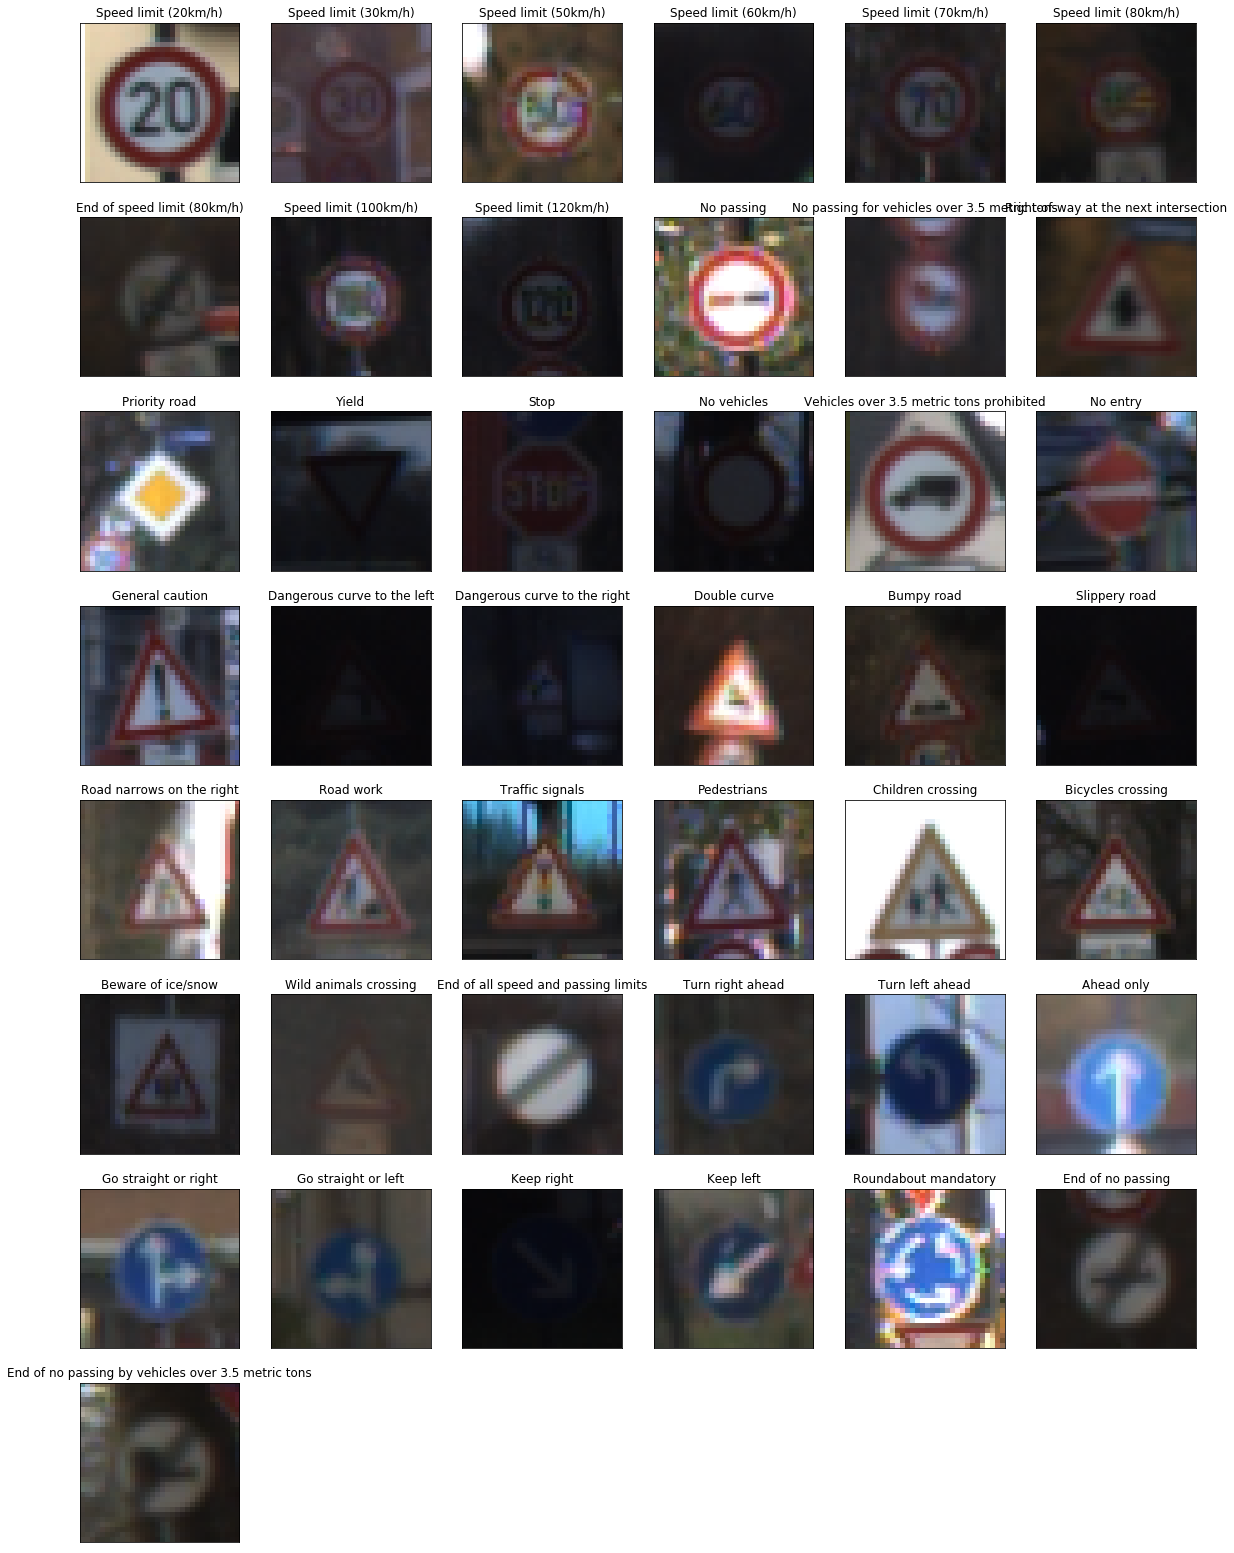

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

plt.figure(figsize=(20,28))
X_list = [0]*n_classes

print()
print("The following are sample images from the dataset.")
for sign_id in range(n_classes):
    X_list[sign_id] = X_train[y_train==sign_id]
    plt.subplot(8,6,sign_id+1)
    plt.title(signs_dict[str(sign_id)])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_list[sign_id][0])

**Data Vis 2:** Now let's take a look at the distribution of our images. We can see per the histograms that our representation for the different classes are quite variable. Many classes are under-represented. We will augment data next to address this issue. 

The distribution of images based on its sign id (aka class).


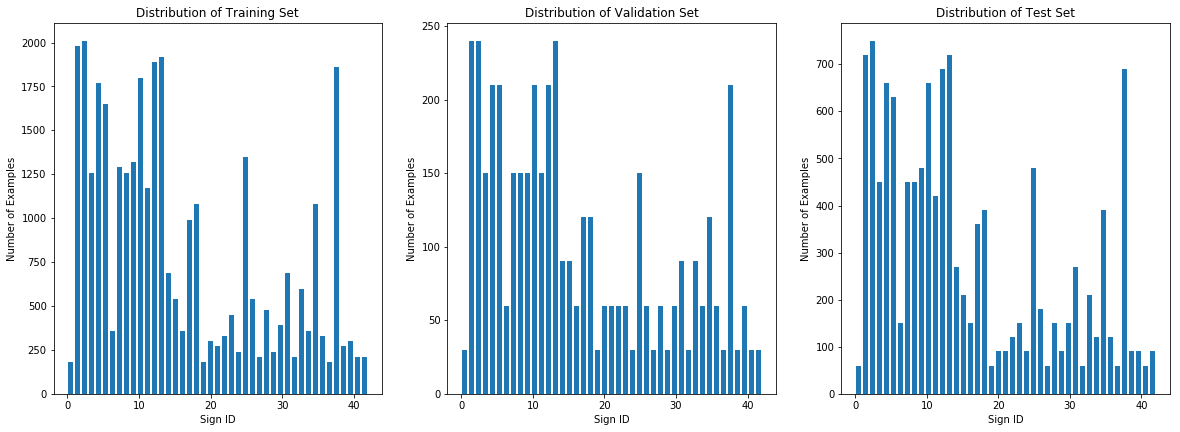

In [5]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
plt.title('Distribution of Training Set')
plt.xlabel('Sign ID')
plt.ylabel('Number of Examples')
plt.hist(y_train, bins=n_classes, histtype='bar', rwidth=0.7)

plt.subplot(2,3,2)
plt.title('Distribution of Validation Set')
plt.xlabel('Sign ID')
plt.ylabel('Number of Examples')
plt.hist(y_valid, bins=n_classes, histtype='bar', rwidth=0.7)

plt.subplot(2,3,3)
plt.title('Distribution of Test Set')
plt.xlabel('Sign ID')
plt.ylabel('Number of Examples')
plt.hist(y_test, bins=n_classes, histtype='bar', rwidth=0.7)

print("The distribution of images based on its sign id (aka class).")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Prior to preprocessing, we augment data to get better representation of our sign classes in our training and validation set. 

In [6]:
### Create additional training data
def data_transform(X, multiple):    
    X_new = np.empty(shape=(X.shape[0]*multiple, 32, 32, 3))
    for i in range(X.shape[0]):
        for j in range(multiple):
            current = i * multiple + j
            angle = 30 * (random.random() - 0.5) ## Random angle between -15 to 15 degrees
            tform = AffineTransform(scale=(random.uniform(0.7,1.0),random.uniform(0.7,1.0)),
                               shear=random.uniform(-0.2,0.2),
                               translation=(random.uniform(-0.2,0.2),random.uniform(-0.2,0.2)))
            
            X_new[current] = rotate(X[i], angle, mode='edge')
            X_new[current] = adjust_gamma(X_new[current], gamma=random.uniform(0.7,1.3))
            X_new[current] = warp(X_new[current], tform.inverse, mode='edge')    
    return X_new

def generate_data(X, y):
    n_classes = len(np.unique(y))
    X_list = [0]*n_classes
    X_new = [0]*n_classes
    y_new = [0]*n_classes
    
    # We split the X data into a list based on its sign id. 
    for sign_id in range(n_classes):
        X_list[sign_id] = X[y==sign_id]
    
    # target_size is the maximum example size of a particular sign_id in our X data. 
    # We want all sign_id examples to approach this target size. 
    target_size = int(max(len(x) for x in X_list))

    for sign_id in range(n_classes):
        # multiple_to_generate specifies how much data we need per sign_id example
        # to have an example size approaching target_size
        multiple_to_generate = (target_size // len(X_list[sign_id]))
        if (multiple_to_generate == 0): 
            multiple_to_generate += 1
            
        X_new[sign_id] = data_transform(X_list[sign_id], multiple_to_generate)
        y_new[sign_id] = np.ones(shape=X_new[sign_id].shape[0], dtype=np.uint8)*sign_id
        
        assert len(X_new[sign_id])==len(y_new[sign_id])
    return np.vstack(X_new), np.concatenate(y_new)

print("Generating augmented examples...")
X_new, y_new = generate_data(X_train, y_train)
print(len(y_new), " total new examples generated")




Generating augmented examples...
74217  total new examples generated


Plot original and a few sample augmented images


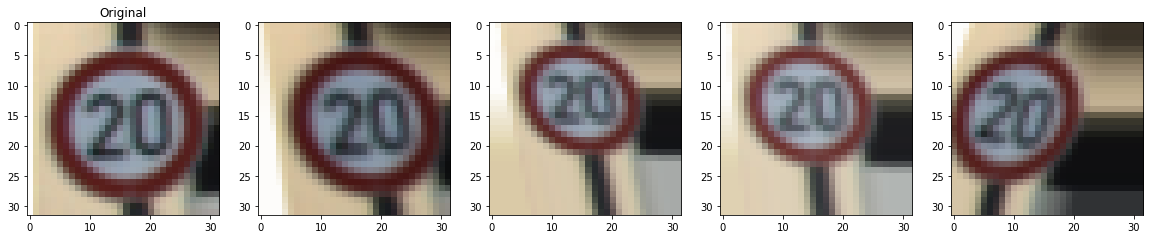

In [11]:
plt.figure(figsize=(20,5))

print("Plot original and a few sample augmented images")
plt.subplot(1,5,1)
plt.title('Original')

# X_train[list(y_train).index(0)] and X_list[0][0] are the same. Both are first image of sign_id=0.
plt.imshow(X_train[list(y_train).index(0)])
for i in range(4):
    plt.subplot(1,5,i+2)
    plt.imshow(X_new[i])

Before (min,max): 16,254
After (min,max): 0.063,0.996


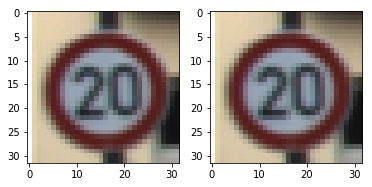

In [12]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def preprocess_grayscale(X):
    # Convert to grayscale
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    # Make it a channel aka (32, 32) -> (32, 32, 1)
    X = X.reshape(X.shape + (1,))
    return(X)
    
def preprocess_normalize(X):
    return((X - np.min(X)) / (np.max(X) - np.min(X)))

before_preprocessing = np.copy(X_train[list(y_train).index(0)])

#X_train = preprocess_grayscale(X_train)
#X_valid = preprocess_grayscale(X_valid)
#X_test = preprocess_grayscale(X_test)

X_new = preprocess_normalize(X_new)
X_train = preprocess_normalize(X_train)
X_valid = preprocess_normalize(X_valid)
X_test = preprocess_normalize(X_test)

after_preprocessing = X_train[list(y_train).index(0)]

print("Before (min,max): {},{}".format(np.min(before_preprocessing), np.max(before_preprocessing)))
print("After (min,max): {:.3f},{:.3f}".format(np.min(after_preprocessing), np.max(after_preprocessing)))

plt.subplot(121)
plt.imshow(before_preprocessing)
plt.subplot(122)
plt.imshow(after_preprocessing)


In [13]:
### New data was generated on the training set. We take 80% of the new data and add it to the training set.
### The remaining 20% is added to the validation set. We shuffle the data prior to splitting otherwise, 
### to make sure images are randomly distributed. 

split_index = int(len(X_new) * 0.8)
X_new, y_new = shuffle(X_new, y_new)

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)
X_train_n = np.concatenate((X_train, X_new[0:split_index]), axis=0)
y_train_n = np.concatenate((y_train, y_new[0:split_index]), axis=0)
X_valid_n = np.concatenate((X_valid, X_new[split_index::]), axis=0)
y_valid_n = np.concatenate((y_valid, y_new[split_index::]), axis=0)
print(X_train_n.shape, y_train_n.shape, X_valid_n.shape, y_valid_n.shape)

(34799, 32, 32, 3) (34799,) (4410, 32, 32, 3) (4410,)
(94172, 32, 32, 3) (94172,) (19254, 32, 32, 3) (19254,)


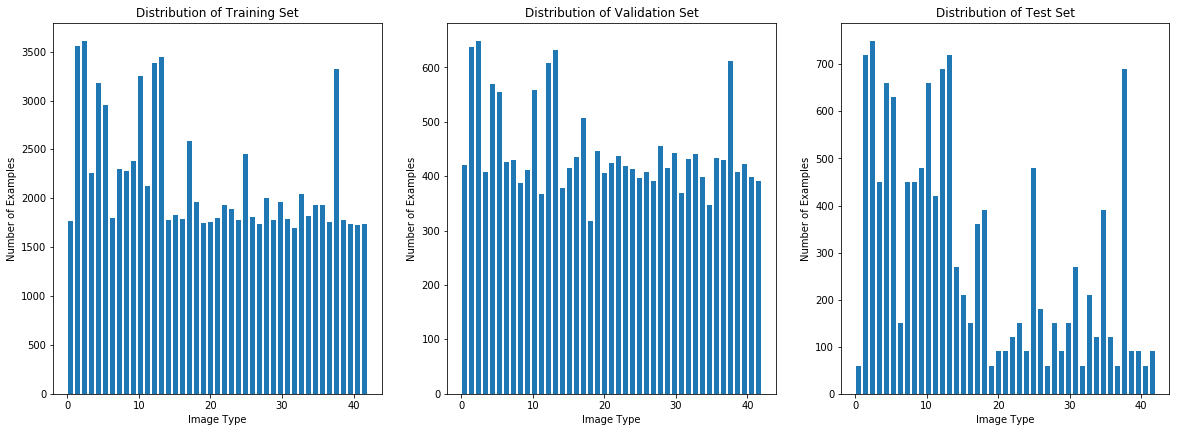

In [14]:
### Verify that the class representation is more even with data augmentation. 

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
plt.title('Distribution of Training Set')
plt.xlabel('Image Type')
plt.ylabel('Number of Examples')
plt.hist(y_train_n, bins=n_classes, histtype='bar', rwidth=0.7)

plt.subplot(2,3,2)
plt.title('Distribution of Validation Set')
plt.xlabel('Image Type')
plt.ylabel('Number of Examples')
plt.hist(y_valid_n, bins=n_classes, histtype='bar', rwidth=0.7)

plt.subplot(2,3,3)
plt.title('Distribution of Test Set')
plt.xlabel('Image Type')
plt.ylabel('Number of Examples')
plt.hist(y_test, bins=n_classes, histtype='bar', rwidth=0.7)

### Shuffle data
X_train, y_train = shuffle(X_train, y_train)


### Model Architecture

In [15]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [16]:
## Key Architecture Functions
def conv_relu(x, conv_parameters):
    weights = tf.Variable(tf.truncated_normal([conv_parameters['filter_size'],
                                               conv_parameters['filter_size'],
                                               conv_parameters['input_d'],
                                               conv_parameters['output_d']],
                                              conv_parameters['mu'],
                                              conv_parameters['sigma']))
    bias = tf.Variable(tf.truncated_normal([conv_parameters['output_d']],
                                           conv_parameters['mu'],
                                           conv_parameters['sigma']))
    conv = tf.nn.conv2d(x, weights,
                        strides=[1,conv_parameters['stride'],conv_parameters['stride'],1],
                        padding=conv_parameters['padding'])
    conv = tf.nn.bias_add(conv, bias)    
    return(tf.nn.relu(conv))

def relu(x):
    return(tf.nn.relu(x))

def max_pool(x, pool_parameters):
    pool = tf.nn.max_pool(x, 
                          ksize=[1,pool_parameters['ksize'],pool_parameters['ksize'],1],
                          strides=[1,pool_parameters['stride'],pool_parameters['stride'],1],
                          padding='SAME')
    return(pool)

def fully_connected(x, parameters):
    weights = tf.Variable(tf.truncated_normal([parameters['input_d'],
                                               parameters['output_d']],
                                              parameters['mu'],
                                              parameters['sigma']
                                             )
                         )
    bias = tf.Variable(tf.truncated_normal([parameters['output_d']],
                                           parameters['mu'],
                                           parameters['sigma']
                                          )
                      )
    full = tf.add(tf.matmul(x, weights), bias)
    
    return(full)

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def myConvNet(x, dropout):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    ### 1st Stage: Conv -> Relu -> Max Pool -> Drop
    # Convolution (F=3, K=32, S=1, P=2), Input: 1@32x32, Output: 32@30x30
    # Max Pool (kernel=2, S=2), Input: 32@30x30, Output: 32@15x15
    # Input and Output Depth of Stage 1
    input_d1, output_d1 = 3, 32
    conv_filter1, conv_stride1 = 3, 1
    pool_ksize1, pool_stride1 = 2, 2
    
    s1 = conv_relu(x, {'filter_size':conv_filter1,'input_d':input_d1,'output_d':output_d1,
                       'padding':'VALID','stride':conv_stride1,'mu':mu,'sigma':sigma})
    s1 = max_pool(s1, {'ksize':pool_ksize1, 'stride':pool_stride1})
    

    ### 2nd Stage, Branch 1: Conv -> Relu -> Max Pool -> Drop
    # Convolution (F=3, K=64, S=1, P=1), Input: 32@15x15, Output: 64@13x13
    # Max Pool (ksize=2, S=1), Input: 64@13x13, Output: 64@6x6
    input_d2, output_d2 = output_d1, 64
    conv_filter2, conv_stride2 = 3, 1
    pool_ksize2, pool_stride2 = 3, 2
    
    s2 = conv_relu(s1, {'filter_size':conv_filter2,'input_d':input_d2,'output_d':output_d2,
                        'padding':'VALID','stride':conv_stride2,'mu':mu,'sigma':sigma})
    s2 = max_pool(s2, {'ksize':pool_ksize2,'stride':pool_stride2})

    ### 3rd Stage
    # Flatten Stage 1 and Stage 2 -> FC
    flat1 = flatten(s1)
    flat2 = flatten(s2)
    s3 = tf.concat([flat1, flat2],1)
    
    output_d3 = s3.get_shape().as_list()[1]
    
    ### 4th Stage
    s4_parameters = {'input_d':output_d3, 'output_d':1024, 'mu':mu, 'sigma':sigma}
    s4 = fully_connected(s3, s4_parameters)
    s4 = relu(s4)
    s4 = tf.nn.dropout(s4, dropout)
    
    ## 5th Stage
    s5_parameters = {'input_d':1024, 'output_d':512, 'mu':mu, 'sigma':sigma}
    s5 = fully_connected(s4, s5_parameters)
    s5 = relu(s5)
    
#    ## 6th Stage
    logits_parameters = {'input_d':512, 'output_d':43, 'mu':mu, 'sigma':sigma}
    logits = fully_connected(s5, logits_parameters)
    
    return logits
    

In [18]:
#Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

keep_prob = tf.placeholder(tf.float32)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [19]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.001
EPOCHS = 20

BATCH_SIZE = 128
dropout = 0.5

logits = myConvNet(x, dropout)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [20]:

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, 
                            feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def evaluate_loss_acc(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], 
                                  feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        
    return total_loss / num_examples, total_accuracy / num_examples

In [21]:
def train(X_train, y_train, X_valid, y_valid, X_test, y_test, dropout, EPOCHS, rate, BATCH_SIZE):
    saver = tf.train.Saver()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        training_loss, training_accuracy = [0]*EPOCHS, [0]*EPOCHS
        validation_loss, validation_accuracy = [0]*EPOCHS, [0]*EPOCHS
        
        
        
        print("Epoch, Tloss, Tacc, Vloss, Vacc")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, 
                         feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})

            training_loss[i], training_accuracy[i] = evaluate_loss_acc(X_train, y_train)
            validation_loss[i], validation_accuracy[i] = evaluate_loss_acc(X_valid, y_valid)

            print("{}, {:.3f}, {:.3f}, {:.3f}, {:.3f}".format(i+1,training_loss[i], training_accuracy[i],
                                                              validation_loss[i], validation_accuracy[i]))

        save_path = saver.save(sess, '/tmp/model.ckpt')
        print("Model saved: %s" % save_path)
        return(training_loss, training_accuracy, validation_loss, validation_accuracy)
        

In [22]:
#Training

print ("Rate: {}, Epochs: {}, Batch: {}, Dropout: {}".format(rate, EPOCHS, BATCH_SIZE, dropout))
t_l, t_a, v_l, v_a = train(X_train_n, y_train_n, X_valid_n, y_valid_n, X_test, y_test, dropout,
                           EPOCHS, rate, BATCH_SIZE)

save_path = '/tmp/model.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
#    saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, save_path)

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Rate: 0.001, Epochs: 20, Batch: 128, Dropout: 0.5
Epoch, Tloss, Tacc, Vloss, Vacc

1, 0.669, 0.785, 0.887, 0.727
2, 0.341, 0.891, 0.602, 0.822
3, 0.221, 0.929, 0.487, 0.873
4, 0.149, 0.952, 0.402, 0.897
5, 0.169, 0.947, 0.467, 0.890
6, 0.147, 0.953, 0.461, 0.893
7, 0.103, 0.967, 0.383, 0.917
8, 0.095, 0.970, 0.388, 0.911
9, 0.093, 0.971, 0.346, 0.923
10, 0.082, 0.975, 0.361, 0.925
11, 0.062, 0.981, 0.363, 0.929
12, 0.064, 0.980, 0.344, 0.933
13, 0.084, 0.976, 0.383, 0.926
14, 0.056, 0.983, 0.364, 0.938
15, 0.062, 0.982, 0.355, 0.936
16, 0.066, 0.980, 0.341, 0.935
17, 0.043, 0.986, 0.336, 0.942
18, 0.060, 0.982, 0.313, 0.941
19, 0.045, 0.986, 0.345, 0.942
20, 0.046, 0.987, 0.361, 0.944
Model saved: /tmp/model.ckpt
Test Accuracy = 0.901


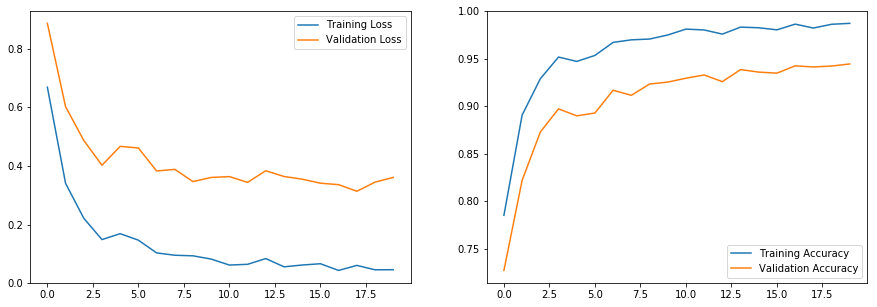

In [23]:
plt.figure(figsize=(15,5))
epoch_axis = range(0,EPOCHS)
plt.subplot(1,2,1)
plt.plot(epoch_axis, t_l, label="Training Loss")
plt.plot(epoch_axis, v_l, label="Validation Loss")
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.plot(epoch_axis, t_a, label="Training Accuracy")
plt.plot(epoch_axis, v_a, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.show()

In [ ]:
save_path = '/tmp/model.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
#    saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, save_path)
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

The following new images were loaded


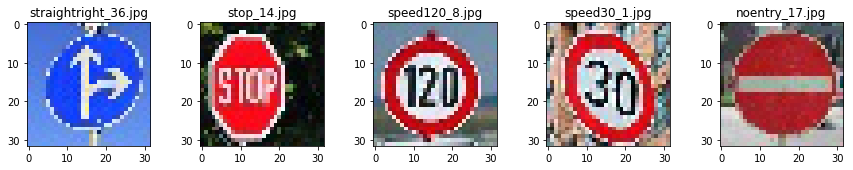

In [24]:
import re

### Load the images and plot them here.
### Feel free to use as many code cells as needed.

files = [file for file in os.listdir('new_signs')
         if file.endswith('.jpg')]

#files = os.listdir('new_signs')

imgs = []
y_web = []

# File names are in the format "filename_signid.jpg", 
# where signid in the file name contains the correct sign_id
# We use regex to extract the sign_id
regex = re.compile(r'_(\d+)')
file_index = 0


print("The following new images were loaded")

plt.figure(figsize=(15,5))

for file in files:
    img = mpimg.imread('new_signs/'+file)  
    imgs.append(img)
    img_y = regex.findall(file)
    y_web += [int(img_y[0])]

    plt.subplot(2,5, file_index+1)
    plt.title(file)
    plt.imshow(img)
    file_index+=1
    
X_web = np.asarray(imgs)



### Predict the Sign Type for Each Image

Performing normalization...


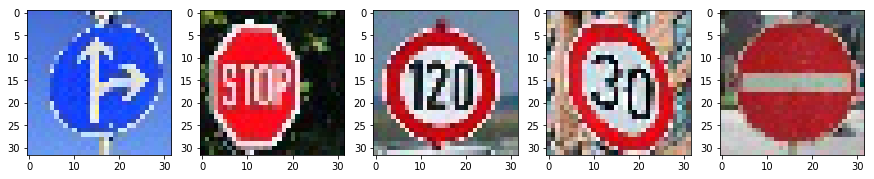

In [25]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#X_web = preprocess_grayscale(X_web)

print("Performing normalization...")
X_web = preprocess_normalize(X_web)

plt.figure(figsize=(15,5))

for i in range(len(X_web)):
    
    plt.subplot(1,5, i+1)
    plt.imshow(X_web[i].squeeze())



### Analyze Performance

In [26]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, save_path)
    web_accuracy, web_softmax = sess.run([accuracy_operation, tf.nn.softmax(logits)],
                                          feed_dict={x: X_web, y: y_web, keep_prob:1.0})
    top5 = sess.run(tf.nn.top_k(web_softmax,k=5,sorted=True))
    print("Web Accuracy = {:.3f}".format(web_accuracy))
    print()
    
for i in range(0,5):
    print("Image{} is {}, predicted {} @ {:.3f} probability".format(i, y_web[i], top5.indices[i][0],
                                                                    top5.values[i][0]))

Web Accuracy = 0.800

Image0 is 36, predicted 35 @ 0.999 probability
Image1 is 14, predicted 14 @ 1.000 probability
Image2 is 8, predicted 8 @ 1.000 probability
Image3 is 1, predicted 1 @ 0.859 probability
Image4 is 17, predicted 17 @ 1.000 probability



Softmax


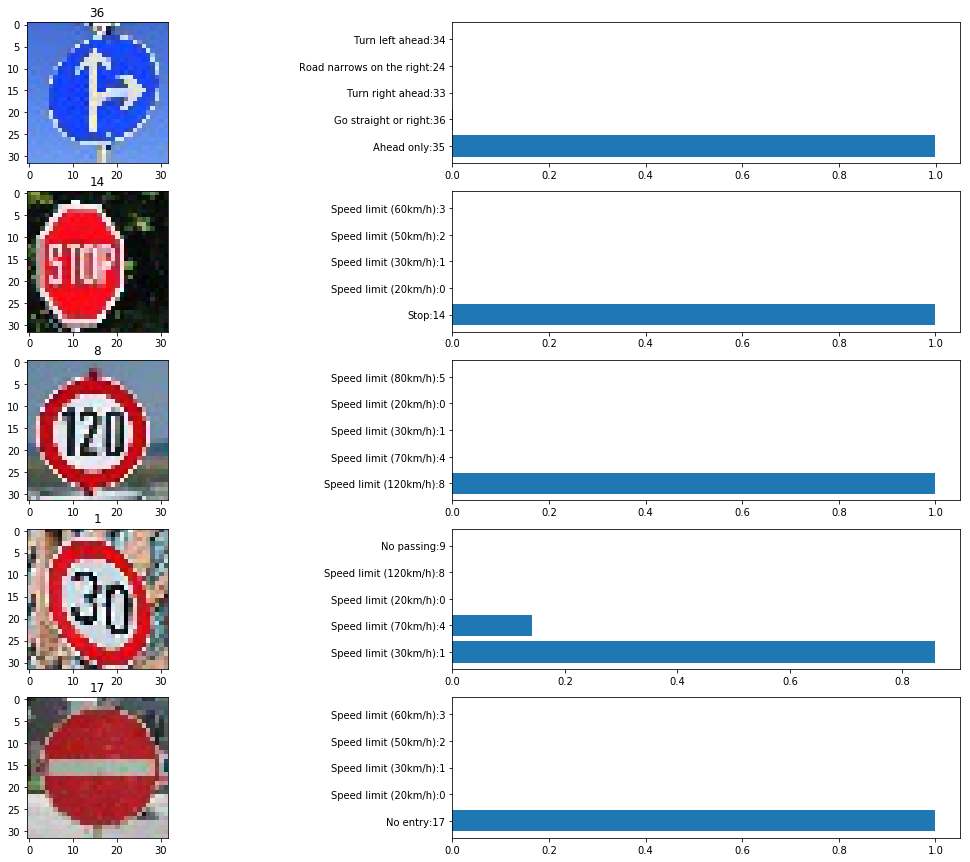

In [27]:

plt.figure(figsize=(20,15))

print()
print("Softmax")
for i in range(0,5):
    plt.subplot(5,2,i*2+1)
    plt.title(y_web[i])
    plt.imshow(X_web[i])

    plt.subplot(5,2,i*2+2)
    plt.barh(np.arange(0,5), top5.values[i])
    predicted_signs = [signs_dict[str(j)]+':'+str(j) for j in top5.indices[i]]
    plt.yticks(np.arange(0,5), predicted_signs)
    
plt.show()


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [32]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Please see visualizations in the above cell

for i in range(0,5):
    predicted_signs = [signs_dict[str(j)]+':'+str(j) for j in top5.indices[i]]
    print("Values for image {}".format(i))
    for k in range(0,5):
        print(predicted_signs[k],"with probability: ", top5.values[i][k])
    print()



Values for image 0
Ahead only:35 with probability:  0.99944
Go straight or right:36 with probability:  0.000559675
Turn right ahead:33 with probability:  2.3451e-16
Road narrows on the right:24 with probability:  2.49345e-18
Turn left ahead:34 with probability:  1.44252e-20

Values for image 1
Stop:14 with probability:  1.0
Speed limit (20km/h):0 with probability:  0.0
Speed limit (30km/h):1 with probability:  0.0
Speed limit (50km/h):2 with probability:  0.0
Speed limit (60km/h):3 with probability:  0.0

Values for image 2
Speed limit (120km/h):8 with probability:  1.0
Speed limit (70km/h):4 with probability:  1.66298e-10
Speed limit (30km/h):1 with probability:  1.4347e-21
Speed limit (20km/h):0 with probability:  2.00999e-24
Speed limit (80km/h):5 with probability:  2.83028e-26

Values for image 3
Speed limit (30km/h):1 with probability:  0.858709
Speed limit (70km/h):4 with probability:  0.141121
Speed limit (20km/h):0 with probability:  0.000162885
Speed limit (120km/h):8 with pro

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

In [ ]:

for sign_id in range(n_classes):
    X_list[sign_id] = X_train[y_train==sign_id]

    plt.subplot(n_classes,2,sign_id*2+1)
    plt.imshow(X_list[sign_id][0])

    plt.subplot(n_classes,2,sign_id*2+2)
    plt.barh([1], [X_list[sign_id].shape[0]])
    plt.xlim((0,2100))
    plt.yticks([1],[signs_dict[str(sign_id)]])
    
plt.show()
#    predicted_signs = [signs_dict[str(j)]+':'+str(j) for j in top5.indices[i]]
#    plt.yticks(np.arange(0,5), predicted_signs)
    

